In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def write_file(filename, data):
    with open(filename, "wb") as f:
        pickle.dump(data, f)
    f.close()
    
def read_file(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)

In [16]:
models = ["GPT-4o-mini", "GPT-4o", "o1-mini", "o3-mini", "o4-mini"]
filenames = ["gpt4o", "gpt4o-mini", "o1mini", "o3mini", "o4mini"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

In [30]:
# {'Accuracy': 0.7640807651434643,
#  'Precision': 0.30618892508143325,
#  'Recall': 0.912621359223301,
#  'F1-Score': 0.4585365853658537}
model_metrics = {}
for i, model in enumerate(filenames):
    filename = f"/Users/sujaltimilsina/Desktop/UMass_Amherst/Classes/spring_2025/685_NLP/NLP_legal/zero-shot/test-{model}-5-improved.pkl"
    data = read_file(filename)
    model_metrics[models[i]] = [
        data["Accuracy"],
        data["Precision"],
        data["Recall"],
        data["F1-Score"]
    ]

In [33]:
model_metrics

{'GPT-4o-mini': [78.02547770700637,
  32.068965517241374,
  90.29126213592234,
  47.32824427480916],
 'GPT-4o': [75.26539278131635,
  29.29936305732484,
  89.32038834951457,
  44.12470023980815],
 'o1-mini': [74.52229299363057,
  29.051987767584098,
  92.23300970873787,
  44.18604651162791],
 'o3-mini': [85.6687898089172,
  42.72727272727273,
  91.2621359223301,
  58.204334365325074],
 'o4-mini': [80.89171974522293,
  35.361216730038024,
  90.29126213592234,
  50.81967213114754]}

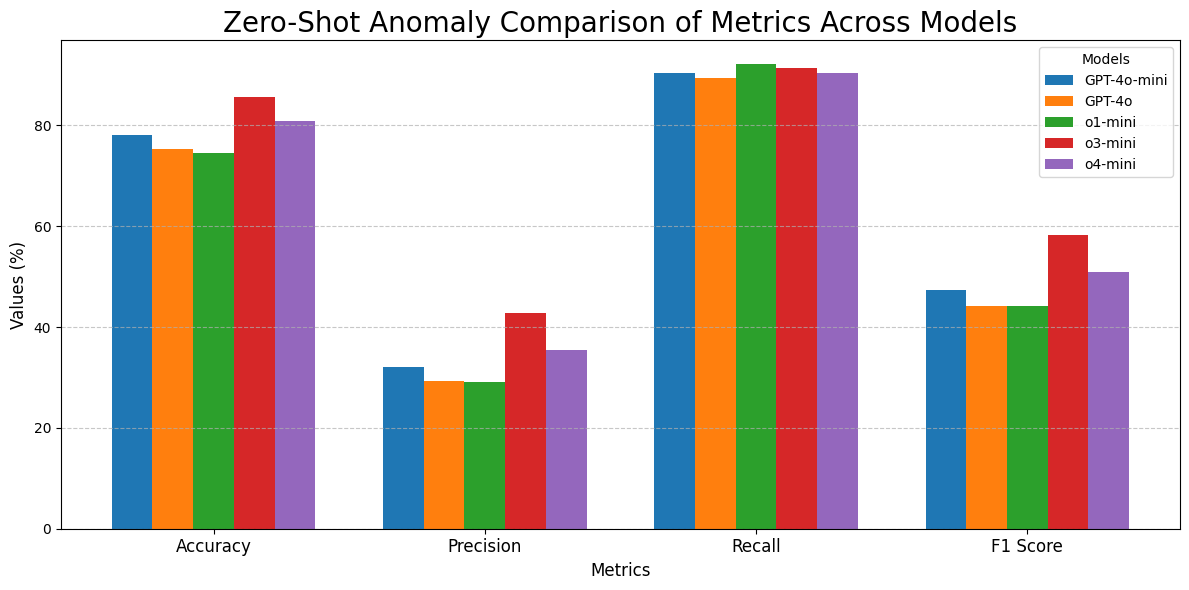

In [32]:
# Convert decimal values to percentages
model_metrics = {
    model: [value * 100 for value in metrics]
    for model, metrics in model_metrics.items()
}

models = list(model_metrics.keys())
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Prepare data for plotting
x = np.arange(len(metrics))  # X-axis positions for metrics
width = 0.15  # Width of each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Easier colors on the eyes

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each model
for i, model in enumerate(models):
    ax.bar(x + i * width, model_metrics[model], width, label=model, color=colors[i])

# Add labels, title, and legend
ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Values (%)", fontsize=12)
ax.set_title("Zero-Shot Anomaly Comparison of Metrics Across Models", fontsize=20)
ax.set_xticks(x + width * (len(models) - 1) / 2)  # Center the x-ticks
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(title="Models", fontsize=10)

# Add gridlines for better readability
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Add spacing between groups of metrics
plt.tight_layout()

# Save the figure before showing it
plt.savefig("metrics_comparison.jpg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

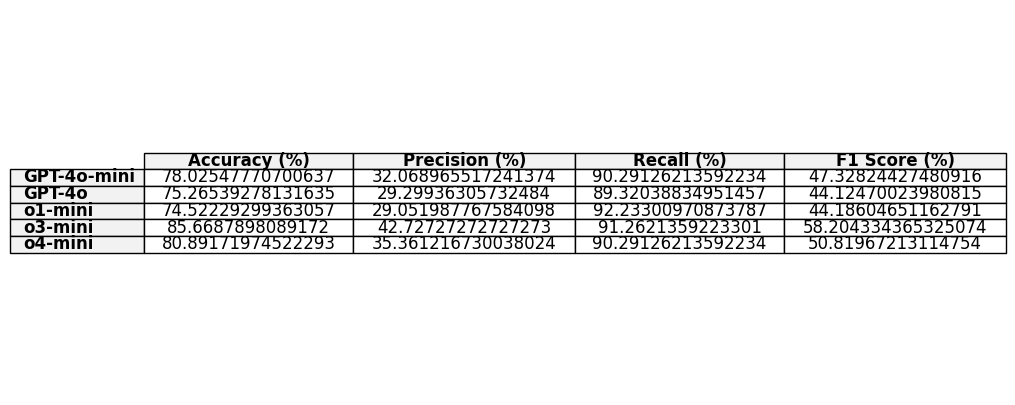

In [36]:
import pandas as pd
# Convert data to a Pandas DataFrame
df = pd.DataFrame.from_dict(model_metrics, orient="index", columns=["Accuracy (%)", "Precision (%)", "Recall (%)", "F1 Score (%)"])
df.index.name = "Model"

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))  # Adjust figure size for better readability
ax.axis("tight")
ax.axis("off")

# Create the table with enhanced formatting
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    rowLabels=df.index,
    loc="center",
    cellLoc="center",
    colLoc="center",
)

# Enhance table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)  # Set font size for better readability
table.auto_set_column_width(col=list(range(len(df.columns))))  # Adjust column width automatically

# Add bold headers
for (row, col), cell in table.get_celld().items():
    if row == 0 or col == -1:  # Header rows and index column
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#f2f2f2")  # Light gray background for headers

# Save the table as an image
plt.savefig("enhanced_metrics_table.png", dpi=300, bbox_inches="tight")
plt.show()